In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the data
df = pd.read_csv("marketing_AB.csv")

In [3]:
# Check first few observations
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [10]:
# Elimino la columna 'Unnamed: 0' porque ya hay un índice
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [5]:
# ¿Hay duplicados de user id?
duplicates = df['user id'].duplicated().sum()
print(duplicates)

0


In [6]:
# ¿Un mismo usuario está en ambos grupos? (violación grave)
user_groups = df.groupby('user id')['test group'].nunique()
contaminated = (user_groups > 1).sum()  # Debe ser 0
print(contaminated)

0


In [8]:
# Analisis de nulos en el DataFrame
null_count = df.isnull().sum()
null_pct = (df.isnull().mean() * 100).round(2)
null_report = pd.DataFrame({'n_nulos': null_count, 'porc_nulos': null_pct})
display(null_report)

,n_nulos,porc_nulos
Unnamed: 0,0,0.0
user id,0,0.0
test group,0,0.0
converted,0,0.0
total ads,0,0.0
most ads day,0,0.0
most ads hour,0,0.0


In [12]:
# Validar el balance de grupos (ad vs psa)
group_counts = df['test group'].value_counts()
group_pct = (df['test group'].value_counts(normalize=True) * 100).round(2)

balance_report = pd.DataFrame({
    'n_usuarios': group_counts,
    'porc_usuarios': group_pct
})

display(balance_report)



,n_usuarios,porc_usuarios
test group,,
ad,564577,96.0
psa,23524,4.0


Conversiones por grupo:
 test group
ad     14423
psa      420
Name: converted, dtype: int64
Tasa de conversión por grupo:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


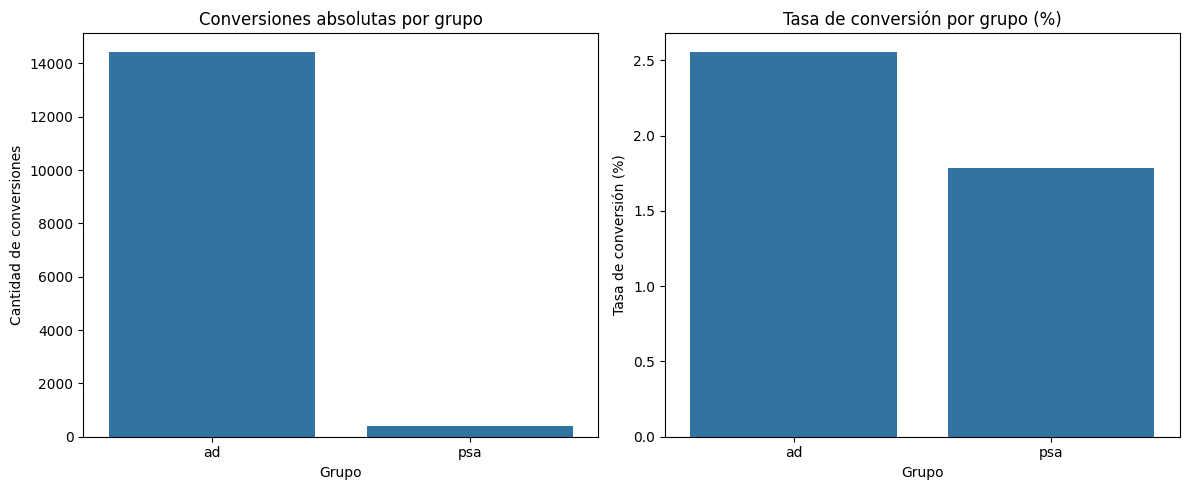

In [11]:

# ¿Hay conversiones en ambos grupos?
conversiones_por_grupo = df.groupby('test group')['converted'].sum()
print("Conversiones por grupo:\n", conversiones_por_grupo)

# También visualizamos la tasa de conversión por grupo
tasa_conversion = df.groupby('test group')['converted'].mean()
print("Tasa de conversión por grupo:\n", tasa_conversion)

# Graficar conversiones absolutas y tasas de conversión
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Conversiones absolutas
sns.barplot(x=conversiones_por_grupo.index, y=conversiones_por_grupo.values, ax=axes[0])
axes[0].set_title("Conversiones absolutas por grupo")
axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Cantidad de conversiones")

# Tasa de conversión
sns.barplot(x=tasa_conversion.index, y=(tasa_conversion.values * 100), ax=axes[1])
axes[1].set_title("Tasa de conversión por grupo (%)")
axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Tasa de conversión (%)")

plt.tight_layout()
plt.show()




,usuarios,total_ads,conversiones,tasa_conversion_%
most ads day,,,,
Monday,87073,2205430,2857,3.28
Tuesday,77479,1853721,2312,2.98
Wednesday,80908,1985418,2018,2.49
Thursday,82982,1944173,1790,2.16
Friday,92608,2464496,2057,2.22
Saturday,81660,2060091,1719,2.11
Sunday,85391,2083853,2090,2.45


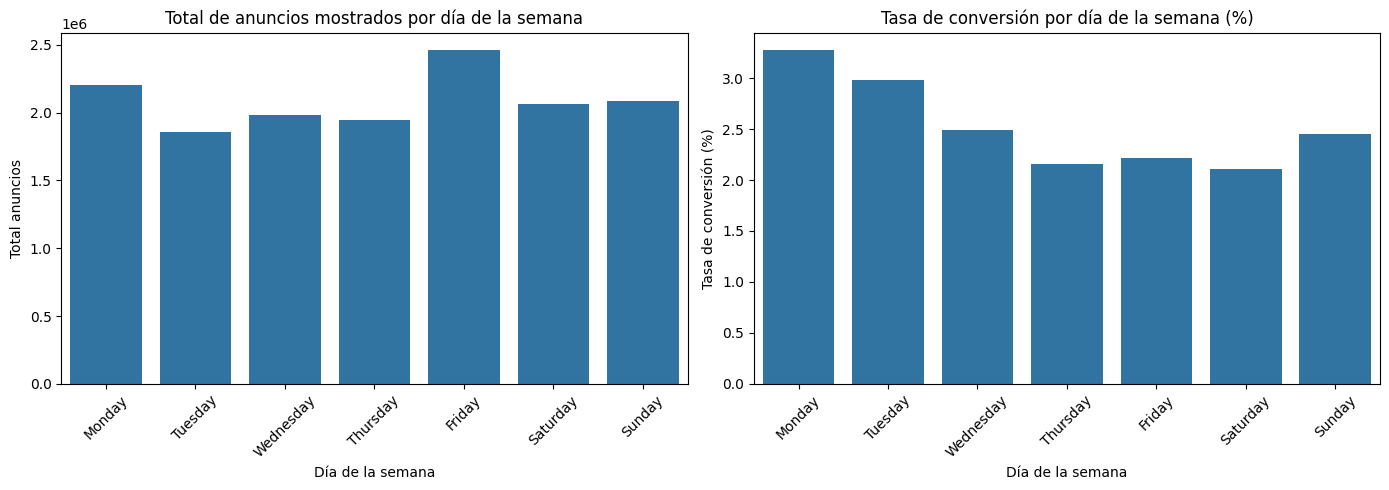

In [13]:
# Analizar estacionalidad: ¿hay diferencias en la cantidad de anuncios ("total ads") y conversiones entre días de la semana?

# Analizamos el total de anuncios por día de la semana
ads_por_dia = df.groupby('most ads day')['total ads'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
conversiones_por_dia = df.groupby('most ads day')['converted'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
usuarios_por_dia = df.groupby('most ads day')['user id'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
tasa_conversion_dia = (conversiones_por_dia / usuarios_por_dia * 100).round(2)

# Mostramos la tabla resumen
estacionalidad = pd.DataFrame({
    'usuarios': usuarios_por_dia,
    'total_ads': ads_por_dia,
    'conversiones': conversiones_por_dia,
    'tasa_conversion_%': tasa_conversion_dia
})
display(estacionalidad)

# Visualizamos
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Panel 1: total de anuncios por día
sns.barplot(x=ads_por_dia.index, y=ads_por_dia.values, ax=axes[0])
axes[0].set_title("Total de anuncios mostrados por día de la semana")
axes[0].set_xlabel("Día de la semana")
axes[0].set_ylabel("Total anuncios")
axes[0].tick_params(axis='x', rotation=45)

# Panel 2: tasa de conversión por día
sns.barplot(x=tasa_conversion_dia.index, y=tasa_conversion_dia.values, ax=axes[1])
axes[1].set_title("Tasa de conversión por día de la semana (%)")
axes[1].set_xlabel("Día de la semana")
axes[1].set_ylabel("Tasa de conversión (%)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


,usuarios,total_ads,conversiones,tasa_conversion_%
most ads hour,,,,
0,5536,126104,102,1.84
1,4802,120914,62,1.29
2,5333,132099,39,0.73
3,2679,60896,28,1.05
4,722,24124,11,1.52
5,765,33391,16,2.09
6,2068,86532,46,2.22
7,6405,199935,116,1.81
8,17627,423747,344,1.95


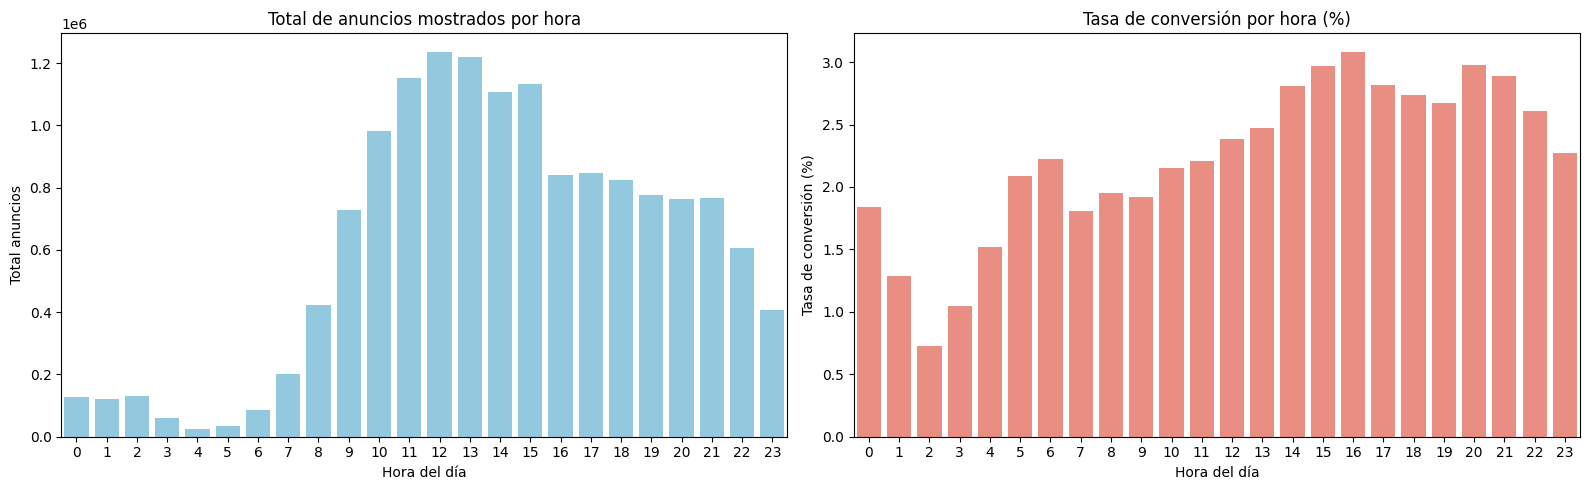

In [14]:
# Analizar estacionalidad por hora: ¿hay diferencias en la cantidad de anuncios y conversiones según la hora del día?

# Total de anuncios por hora
ads_por_hora = df.groupby('most ads hour')['total ads'].sum().sort_index()
conversiones_por_hora = df.groupby('most ads hour')['converted'].sum().sort_index()
usuarios_por_hora = df.groupby('most ads hour')['user id'].count().sort_index()
tasa_conversion_hora = (conversiones_por_hora / usuarios_por_hora * 100).round(2)

# Tabla resumen
estacionalidad_hora = pd.DataFrame({
    'usuarios': usuarios_por_hora,
    'total_ads': ads_por_hora,
    'conversiones': conversiones_por_hora,
    'tasa_conversion_%': tasa_conversion_hora
})
display(estacionalidad_hora)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(16,5))

# Panel 1: total de anuncios por hora
sns.barplot(x=ads_por_hora.index, y=ads_por_hora.values, ax=axes[0], color='skyblue')
axes[0].set_title('Total de anuncios mostrados por hora')
axes[0].set_xlabel('Hora del día')
axes[0].set_ylabel('Total anuncios')

# Panel 2: tasa de conversión por hora
sns.barplot(x=tasa_conversion_hora.index, y=tasa_conversion_hora.values, ax=axes[1], color='salmon')
axes[1].set_title('Tasa de conversión por hora (%)')
axes[1].set_xlabel('Hora del día')
axes[1].set_ylabel('Tasa de conversión (%)')

plt.tight_layout()
plt.show()

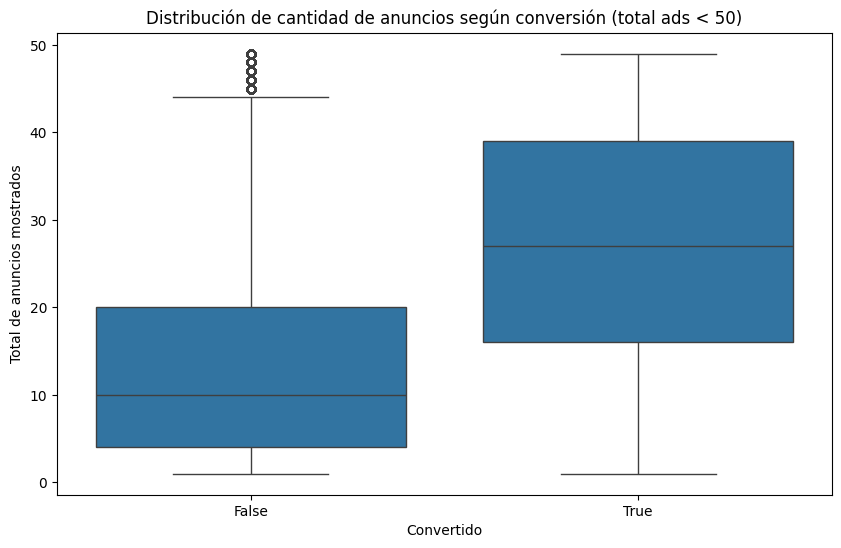

In [ ]:
## ¿los que convirtieron vieron mas anuncios? --> Si
plt.figure(figsize=(10, 6))
df_ads_menor_50 = df[df['total ads'] < 50]
sns.boxplot(x='converted', y='total ads', data=df_ads_menor_50)
plt.title('Distribución de cantidad de anuncios según conversión (total ads < 50)')
plt.xlabel('Convertido')
plt.ylabel('Total de anuncios mostrados')
plt.show()

## Test A/B: ads vs psa (one-sided)

**Hipótesis:**
- H0: La tasa de conversión de ads ≤ tasa de conversión de psa
- H1: La tasa de conversión de ads es al menos 10% mayor que psa (MDE relativo)
- α = 0.05 (p < 0.05)

In [21]:
# Test A/B one-sided: H1: p_ad > p_psa, alpha=0.05
import numpy as np
from scipy import stats

# Datos por grupo
df_ad = df[df['test group'] == 'ad']
df_psa = df[df['test group'] == 'psa']

n_ad = len(df_ad)
n_psa = len(df_psa)
conversions_ad = df_ad['converted'].sum()
conversions_psa = df_psa['converted'].sum()

# Tasas de conversión
p_ad = conversions_ad / n_ad
p_psa = conversions_psa / n_psa
lift_abs = p_ad - p_psa
lift_rel = (p_ad - p_psa) / p_psa if p_psa > 0 else 0

# Z-test two-proportion one-sided: H1: p_ad > p_psa
# Código 100% en numpy/scipy, sin statsmodels (evita error de módulo ausente)
# Usando fórmula de proporciones agrupadas (pooled)
p_pooled = (conversions_ad + conversions_psa) / (n_ad + n_psa)
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_ad + 1/n_psa))
z_stat = (p_ad - p_psa) / se
p_value = 1 - stats.norm.cdf(z_stat)  # one-sided: P(Z > z)

# Resultados
print("=" * 50)
print("RESULTADOS DEL TEST A/B (one-sided)")
print("=" * 50)
print(f"\nGrupo ads:  n={n_ad:,}, conversiones={conversions_ad:,}, tasa={p_ad:.4f} ({p_ad*100:.2f}%)")
print(f"Grupo psa:  n={n_psa:,}, conversiones={conversions_psa:,}, tasa={p_psa:.4f} ({p_psa*100:.2f}%)")
print(f"\nLift absoluto: {lift_abs:.4f} ({lift_abs*100:.2f} pp)")
print(f"Lift relativo: {lift_rel:.2%} (ads es {(1+lift_rel):.2%} de psa)")
print(f"\nZ-estadístico: {z_stat:.4f}")
print(f"p-value (one-sided): {p_value:.6f}")
print(f"α = 0.05")
print("=" * 50)
if p_value < 0.05:
    print("\n>>> RECHAZAMOS H0: La tasa de conversión de ads es significativamente mayor que psa (p < 0.05)")
    if lift_rel >= 0.10:
        print(f">>> El lift relativo ({lift_rel:.1%}) alcanza el MDE objetivo (≥10%).")
    else:
        print(f">>> El lift relativo ({lift_rel:.1%}) NO alcanza el MDE objetivo (≥10%), aunque la diferencia es estadísticamente significativa.")
else:
    print("\n>>> NO RECHAZAMOS H0: No hay evidencia suficiente de que ads convierta más que psa (p >= 0.05)")

RESULTADOS DEL TEST A/B (one-sided)

Grupo ads:  n=564,577, conversiones=14,423, tasa=0.0255 (2.55%)
Grupo psa:  n=23,524, conversiones=420, tasa=0.0179 (1.79%)

Lift absoluto: 0.0077 (0.77 pp)
Lift relativo: 43.09% (ads es 143.09% de psa)

Z-estadístico: 7.3701
p-value (one-sided): 0.000000
α = 0.05

>>> RECHAZAMOS H0: La tasa de conversión de ads es significativamente mayor que psa (p < 0.05)
>>> El lift relativo (43.1%) alcanza el MDE objetivo (≥10%).


## Análisis: most ads day vs converted

**Hipótesis:**
- H0: No hay asociación entre el día con más anuncios y la conversión.
- H1: Existe asociación (al menos un día difiere).
- α = 0.05

**Post-hoc (si Chi² significativo):** comparar mejor vs peor día (one-sided).

In [22]:
# Test: most ads day vs converted
# Chi-cuadrado de independencia + post-hoc mejor vs peor

import numpy as np
from scipy import stats

# Tabla de contingencia: día x converted
tabla = pd.crosstab(df['most ads day'], df['converted'])
# Ordenar días
orden_dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
tabla = tabla.reindex(orden_dias)

# 1. Chi-cuadrado de independencia
chi2, p_chi2, dof, expected = stats.chi2_contingency(tabla)

# 2. Tasas por día
usuarios_por_dia = tabla.sum(axis=1)
conversiones_por_dia = tabla[True] if True in tabla.columns else tabla.iloc[:, 1]
tasas = conversiones_por_dia / usuarios_por_dia

mejor_dia = tasas.idxmax()
peor_dia = tasas.idxmin()
p_mejor = tasas[mejor_dia]
p_peor = tasas[peor_dia]
n_mejor = usuarios_por_dia[mejor_dia]
n_peor = usuarios_por_dia[peor_dia]
conv_mejor = conversiones_por_dia[mejor_dia]
conv_peor = conversiones_por_dia[peor_dia]

# 3. Z-test one-sided: H1: mejor_dia > peor_dia
p_pooled = (conv_mejor + conv_peor) / (n_mejor + n_peor)
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_mejor + 1/n_peor))
z_stat = (p_mejor - p_peor) / se
p_value = 1 - stats.norm.cdf(z_stat)
lift_rel = (p_mejor - p_peor) / p_peor if p_peor > 0 else 0

# Resultados
print("=" * 55)
print("ANÁLISIS: most ads day vs converted")
print("=" * 55)
print("\n1. Chi-cuadrado de independencia:")
print(f"   χ² = {chi2:.4f}, p-value = {p_chi2:.6f}")
print(f"   Conclusión: {'RECHAZAMOS H0 (hay asociación)' if p_chi2 < 0.05 else 'NO rechazamos H0'}")

print("\n2. Tasas por día:")
for d in orden_dias:
    print(f"   {d}: {tasas[d]:.2%} (n={usuarios_por_dia[d]:,})")

print(f"\n3. Post-hoc (one-sided): {mejor_dia} vs {peor_dia}")
print(f"   Mejor ({mejor_dia}): {p_mejor:.2%}")
print(f"   Peor ({peor_dia}): {p_peor:.2%}")
print(f"   Lift relativo: {lift_rel:.1%}")
print(f"   Z = {z_stat:.4f}, p-value = {p_value:.6f}")
if p_value < 0.05:
    print(f"   >>> {mejor_dia} convierte significativamente más que {peor_dia} (p < 0.05)")
else:
    print("   >>> Diferencia no significativa entre mejor y peor día")
print("=" * 55)

ANÁLISIS: most ads day vs converted

1. Chi-cuadrado de independencia:
   χ² = 410.0479, p-value = 0.000000
   Conclusión: RECHAZAMOS H0 (hay asociación)

2. Tasas por día:
   Monday: 3.28% (n=87,073)
   Tuesday: 2.98% (n=77,479)
   Wednesday: 2.49% (n=80,908)
   Thursday: 2.16% (n=82,982)
   Friday: 2.22% (n=92,608)
   Saturday: 2.11% (n=81,660)
   Sunday: 2.45% (n=85,391)

3. Post-hoc (one-sided): Monday vs Saturday
   Mejor (Monday): 3.28%
   Peor (Saturday): 2.11%
   Lift relativo: 55.9%
   Z = 14.8632, p-value = 0.000000
   >>> Monday convierte significativamente más que Saturday (p < 0.05)


## Análisis: most ads hour vs converted

**Objetivo:** Detectar franjas horarias con más conversión para programar campañas en horas más efectivas.

**Hipótesis:**
- H0: No hay asociación entre la hora con más anuncios y la conversión.
- H1: Existe asociación (al menos una hora difiere).
- α = 0.05

**Post-hoc (si Chi² significativo):** comparar mejor vs peor hora (one-sided).

In [23]:
# Test: most ads hour vs converted
# Chi-cuadrado de independencia + post-hoc mejor vs peor hora

import numpy as np
from scipy import stats

# Tabla de contingencia: hora x converted
tabla_hora = pd.crosstab(df['most ads hour'], df['converted'])
# Ordenar por hora (0-23)
tabla_hora = tabla_hora.reindex(range(24)).fillna(0).astype(int)

# 1. Chi-cuadrado de independencia
chi2, p_chi2, dof, expected = stats.chi2_contingency(tabla_hora)

# 2. Tasas por hora
usuarios_por_hora = tabla_hora.sum(axis=1)
conversiones_por_hora = tabla_hora[True] if True in tabla_hora.columns else tabla_hora.iloc[:, 1]
tasas_hora = conversiones_por_hora / usuarios_por_hora
tasas_hora = tasas_hora.replace([np.inf, -np.inf], 0).fillna(0)

mejor_hora = tasas_hora.idxmax()
peor_hora = tasas_hora.idxmin()
p_mejor = tasas_hora[mejor_hora]
p_peor = tasas_hora[peor_hora]
n_mejor = usuarios_por_hora[mejor_hora]
n_peor = usuarios_por_hora[peor_hora]
conv_mejor = conversiones_por_hora[mejor_hora]
conv_peor = conversiones_por_hora[peor_hora]

# 3. Z-test one-sided: H1: mejor_hora > peor_hora
p_pooled = (conv_mejor + conv_peor) / (n_mejor + n_peor)
se = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_mejor + 1/n_peor))
z_stat = (p_mejor - p_peor) / se if se > 0 else 0
p_value = 1 - stats.norm.cdf(z_stat)
lift_rel = (p_mejor - p_peor) / p_peor if p_peor > 0 else 0

# Resultados
print("=" * 55)
print("ANÁLISIS: most ads hour vs converted")
print("=" * 55)
print("\n1. Chi-cuadrado de independencia:")
print(f"   χ² = {chi2:.4f}, p-value = {p_chi2:.6f}")
print(f"   Conclusión: {'RECHAZAMOS H0 (hay asociación)' if p_chi2 < 0.05 else 'NO rechazamos H0'}")

print("\n2. Tasas por hora:")
for h in range(24):
    if usuarios_por_hora[h] > 0:
        print(f"   {h:2d}h: {tasas_hora[h]:.2%} (n={usuarios_por_hora[h]:,})")

print(f"\n3. Post-hoc (one-sided): hora {mejor_hora} vs hora {peor_hora}")
print(f"   Mejor ({mejor_hora}h): {p_mejor:.2%}")
print(f"   Peor ({peor_hora}h): {p_peor:.2%}")
print(f"   Lift relativo: {lift_rel:.1%}")
print(f"   Z = {z_stat:.4f}, p-value = {p_value:.6f}")
if p_value < 0.05:
    print(f"   >>> La hora {mejor_hora}h convierte significativamente más que {peor_hora}h (p < 0.05)")
else:
    print("   >>> Diferencia no significativa entre mejor y peor hora")
print("=" * 55)

ANÁLISIS: most ads hour vs converted

1. Chi-cuadrado de independencia:
   χ² = 430.7687, p-value = 0.000000
   Conclusión: RECHAZAMOS H0 (hay asociación)

2. Tasas por hora:
    0h: 1.84% (n=5,536)
    1h: 1.29% (n=4,802)
    2h: 0.73% (n=5,333)
    3h: 1.05% (n=2,679)
    4h: 1.52% (n=722)
    5h: 2.09% (n=765)
    6h: 2.22% (n=2,068)
    7h: 1.81% (n=6,405)
    8h: 1.95% (n=17,627)
    9h: 1.92% (n=31,004)
   10h: 2.15% (n=38,939)
   11h: 2.21% (n=46,210)
   12h: 2.38% (n=47,298)
   13h: 2.47% (n=47,655)
   14h: 2.81% (n=45,648)
   15h: 2.97% (n=44,683)
   16h: 3.08% (n=37,567)
   17h: 2.82% (n=34,988)
   18h: 2.74% (n=32,323)
   19h: 2.67% (n=30,352)
   20h: 2.98% (n=28,923)
   21h: 2.89% (n=29,976)
   22h: 2.61% (n=26,432)
   23h: 2.27% (n=20,166)

3. Post-hoc (one-sided): hora 16 vs hora 2
   Mejor (16h): 3.08%
   Peor (2h): 0.73%
   Lift relativo: 320.8%
   Z = 9.7419, p-value = 0.000000
   >>> La hora 16h convierte significativamente más que 2h (p < 0.05)


### Conclusión: Test A/B ads vs psa
- **Rechazamos H0**: la tasa de conversión de ads (2.55%) es significativamente mayor que la de psa (1.79%), p ≈ 0.
- **Lift relativo**: 43%, alcanza el MDE objetivo (≥10%).
- **Recomendación**: implementar ads en lugar de psa.

### Conclusión: most ads day vs converted
- **Rechazamos H0**: hay asociación entre el día con más anuncios y la conversión (χ² = 410, p ≈ 0).
- **Mejor día**: Monday (3.28%); **peor día**: Saturday (2.11%); lift 56%, p < 0.05.
- **Recomendación**: priorizar campañas entre semana, especialmente lunes; reducir intensidad los sábados.

### Conclusión: most ads hour vs converted
- **Rechazamos H0**: hay asociación entre la hora con más anuncios y la conversión (χ² = 431, p ≈ 0).
- **Mejor hora**: 16h (3.08%); **peor hora**: 2h (0.73%); lift 321%, p < 0.05.
- **Recomendación**: programar campañas preferentemente entre 14h y 20h; evitar o reducir intensidad en madrugada (0h–5h).

---
## Resumen de conclusiones

| Análisis | Resultado | Recomendación |
|----------|-----------|---------------|
| **A/B ads vs psa** | ads 2.55% vs psa 1.79%; lift 43%; p ≈ 0 | Implementar ads |
| **most ads day** | Lunes mejor (3.28%), sábado peor (2.11%); lift 56% | Priorizar entre semana, reducir sábados |
| **most ads hour** | 16h mejor (3.08%), 2h peor (0.73%); lift 321% | Programar campañas 14h–20h, evitar madrugada |

